In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import classification_report, confusion_matrix



In [2]:
def one_hot_labels(image, label):
    return image, tf.one_hot(label, depth=4)


# Escalar los valores de píxeles en el rango [0, 1]
def rescale(image, label):
    return image / 255., label

# Definir transformaciones de aumento de datos personalizadas
def preprocess_image(image, label):
    image = tf.image.random_flip_left_right(image)  # Aplicar horizontal_flip
    image = tf.image.random_brightness(image, 0.2)  # Modificar brillo de la imagen
    image = tf.image.random_contrast(image, 0.9, 1.1)  # Modificar contraste de la imagen
    return image, label

# Cargar y preparar datos de entrenamiento y validación
unprocessed_train_data = image_dataset_from_directory('/Users/baudi/AI/practicas/uvas/data/train_val/',
                                        image_size=(150, 150),
                                        labels="inferred",
                                        label_mode="categorical",
                                        batch_size=32,
                                        seed=42,
                                        shuffle=True,
                                        validation_split=0.2,
                                        subset='training')

train_data = unprocessed_train_data.map(rescale).map(preprocess_image)  # Escalar y aplicar transformaciones personalizadas

validation_data = image_dataset_from_directory('/Users/baudi/AI/practicas/uvas/data/train_val/',
                                        image_size=(150, 150),
                                        labels="inferred",
                                        label_mode="categorical",
                                        batch_size=32,
                                        seed=42,
                                        shuffle=True,
                                        validation_split=0.2,
                                        subset='validation')

validation_data = validation_data.map(rescale) # Escalar valores de píxeles en el rango [0, 1]

# Carga y prepara los datos de prueba
test_data = image_dataset_from_directory('/Users/baudi/AI/practicas/uvas/data/test/',
                                        image_size=(150, 150),
                                        labels="inferred",
                                        label_mode="categorical",
                                        batch_size=32,
                                        shuffle=False)

test_data = test_data.map(rescale) # Escalar valores de píxeles en el rango [0, 1]


Found 3248 files belonging to 4 classes.
Using 2599 files for training.
Metal device set to: Apple M2 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

Found 3248 files belonging to 4 classes.
Using 649 files for validation.
Found 814 files belonging to 4 classes.


2023-04-07 16:11:09.277590: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-07 16:11:09.277781: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(512, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 clases: sanas, enfermedad1, enfermedad2, enfermedad3
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [4]:
history = model.fit(train_data,
                    epochs=30,
                    validation_data=validation_data)


Epoch 1/30


2023-04-07 16:11:31.706827: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-07 16:11:32.064488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


82/82 [==============================] - ETA: 0s - loss: 0.6298 - accuracy: 0.8038

2023-04-07 16:11:36.560126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


82/82 [==============================] - 5s 55ms/step - loss: 0.6298 - accuracy: 0.8038 - val_loss: 4.6537 - val_accuracy: 0.2465
Epoch 2/30
82/82 [==============================] - 4s 51ms/step - loss: 0.2717 - accuracy: 0.8980 - val_loss: 8.5959 - val_accuracy: 0.2851
Epoch 3/30
82/82 [==============================] - 4s 52ms/step - loss: 0.2429 - accuracy: 0.9177 - val_loss: 10.2946 - val_accuracy: 0.1294
Epoch 4/30
82/82 [==============================] - 4s 51ms/step - loss: 0.1544 - accuracy: 0.9473 - val_loss: 9.9049 - val_accuracy: 0.1294
Epoch 5/30
82/82 [==============================] - 4s 51ms/step - loss: 0.1472 - accuracy: 0.9492 - val_loss: 7.8071 - val_accuracy: 0.1418
Epoch 6/30
82/82 [==============================] - 4s 52ms/step - loss: 0.0803 - accuracy: 0.9723 - val_loss: 4.6317 - val_accuracy: 0.3559
Epoch 7/30
82/82 [==============================] - 4s 51ms/step - loss: 0.0660 - accuracy: 0.9769 - val_loss: 1.8306 - val_accuracy: 0.5809
Epoch 8/30
82/82 [=====

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 64)       256       
 hNormalization)                                                 
                                                        

In [ ]:
model.layers

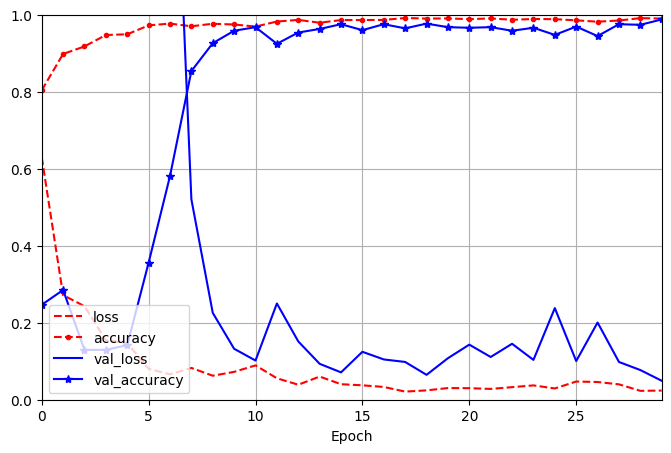

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()


In [8]:
test_loss, test_accuracy = model.evaluate(test_data)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)

26/26 [==============================] - 0s 15ms/step - loss: 0.0625 - accuracy: 0.9803
Test Loss:  0.06251439452171326
Test Accuracy:  0.9803439378738403


In [9]:
# Extraer las etiquetas verdaderas
y_true = np.concatenate([y.numpy() for _, y in test_data])

# Convertir las etiquetas verdaderas a formato multiclase
y_true = np.argmax(y_true, axis=1)

class_names = unprocessed_train_data.class_names

# Matriz de confusión y métricas adicionales
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report:')
print(classification_report(y_true, y_pred, target_names=class_names))

print('Confusion Matrix:')
print(confusion_matrix(y_true, y_pred))


 9/26 [=========>....................] - ETA: 0s

2023-04-07 16:14:16.261672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 0s 14ms/step
Classification Report:
                                            precision    recall  f1-score   support

                         Grape___Black_rot       0.97      0.96      0.97       236
              Grape___Esca_(Black_Measles)       0.97      0.98      0.97       277
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)       1.00      0.99      1.00       216
                           Grape___healthy       0.99      1.00      0.99        85

                                  accuracy                           0.98       814
                                 macro avg       0.98      0.98      0.98       814
                              weighted avg       0.98      0.98      0.98       814

Confusion Matrix:
[[227   9   0   0]
 [  5 272   0   0]
 [  1   0 214   1]
 [  0   0   0  85]]


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def rescale(image, label):
    return image / 255., label

# Definir transformaciones de aumento de datos personalizadas
def preprocess_image(image, label):
    image = tf.image.random_flip_left_right(image)  # Aplicar horizontal_flip
    image = tf.image.random_brightness(image, 0.2)  # Modificar brillo de la imagen
    image = tf.image.random_contrast(image, 0.9, 1.1)  # Modificar contraste de la imagen
    return image, label

def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(256, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(512, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(1024, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(4, activation='softmax')  # 4 clases: sanas, enfermedad1, enfermedad2, enfermedad3
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def one_hot_labels(image, label):
    return image, tf.one_hot(label, depth=4)


def custom_preprocessing_function(img):
    img = tf.image.random_flip_left_right(img)  # Aplicar horizontal_flip
    img = tf.image.random_brightness(img, 0.2)  # Modificar brillo de la imagen
    img = tf.image.random_contrast(img, 0.9, 1.1)  # Modificar contraste de la imagen
    return img



def cross_validate(model_builder, data_loader, n_splits=2, epochs=50):
    # Cargar y preprocesar los datos
    #train_data, validation_data, test_data = data_loader()

    train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    preprocessing_function=custom_preprocessing_function,
                                    validation_split=0.2)  # Split del 20% para validación

    train_data = train_datagen.flow_from_directory('/Users/baudi/AI/practicas/uvas/data/train_val/',
                                                target_size=(150, 150),
                                                batch_size=32,
                                                seed=42,
                                                shuffle=True,
                                                class_mode='categorical',
                                                subset='training')
    

    validation_data = train_datagen.flow_from_directory('/Users/baudi/AI/practicas/uvas/data/train_val/',
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        seed=42,
                                                        shuffle=True,
                                                        class_mode='categorical',
                                                        subset='validation')


    # Carga y prepara los datos de prueba
    test_datagen = ImageDataGenerator(rescale=1./255)

    test_data = test_datagen.flow_from_directory('/Users/baudi/AI/practicas/uvas/data/test/',
                                                target_size=(150, 150),
                                                batch_size=32,
                                                class_mode='categorical',
                                                shuffle=False)  # No es necesario barajar las imágenes de prueba





    # Crear el objeto KFold
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Convertir los conjuntos de entrenamiento y validación en arrays NumPy para el uso de KFold
    X = np.concatenate([train_data[i][0] for i in range(len(train_data))] +
                       [validation_data[i][0] for i in range(len(validation_data))])

    y = np.concatenate([train_data[i][1] for i in range(len(train_data))] +
                       [validation_data[i][1] for i in range(len(validation_data))])

    accuracies = []

    # Realizar la validación cruzada
    for train_idx, val_idx in kfold.split(X, y):
        # Crear y compilar el modelo
        model = model_builder()

        # Entrenar el modelo en los pliegues de entrenamiento
        model.fit(X[train_idx],
                  y[train_idx],
                  validation_data=(X[val_idx], y[val_idx]),
                  epochs=epochs)
        
        
        # Evaluar el modelo en los pliegues de validación
        #y_pred = model.predict(X[val_idx])
        #y_true = y[val_idx]
        #accuracy = accuracy_score(y_true, y_pred)

        #print(f'Accuracy: {accuracy:.4f}')

        ##accuracies.append(accuracy)
                
        test_loss, test_accuracy = model.evaluate(test_data)
        print(f'Test Loss: {test_loss:.4f}')
        print(f'Test Accuracy: {test_accuracy:.4f}')


    # Calcular y retornar la precisión promedio
    #return np.mean(accuracies)

# Ejemplo de uso
mean_accuracy = cross_validate(build_model, load_and_preprocess_data)
#print(f'Mean accuracy: {mean_accuracy:.4f}')


In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [ ]:


def build_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))  # 4 clases: sanas, enfermedad1, enfermedad2, enfermedad3

    model.compile(optimizer=Adam(learning_rate=0.01),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model
